# 3. Ranking Data - Understanding the co-relation between keyword rankings with description or any other attribute.

In [16]:
import re
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats

In [17]:
data_2 = pd.read_csv("browser_rankings_data.csv")

In [18]:
data_2

,ID,Keyword,Rank,Country,Language,Date,App ID,Date of Last Description Change,Short Description,Long Description
0,1,browser,2.0,in,en,12/16/2020,net.fast.web.browser,12/18/2020,"The small, fastest, secure Web Browser, best m...","One of the smallest, fastest, secure Web Brows..."
1,2,browser,3.0,in,en,12/16/2020,com.android.chrome,12/18/2020,"Fast, simple, and secure. Google Chrome browse...","Google Chrome is a fast, easy to use, and secu..."
2,3,browser,4.0,in,en,12/16/2020,com.opera.browser,2/27/2021,"Fast, safe web browser: free VPN, Ad blocker, ...","Fast, safe and private, introducing the latest..."
3,3,browser,4.0,in,en,12/16/2020,com.opera.browser,12/18/2020,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And..."
4,4,browser,1.0,in,en,12/16/2020,com.cloudmosa.puffinTV,2/7/2021,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...
...,...,...,...,...,...,...,...,...,...,...
3061,131575,android browser,7.0,in,en,3/6/2021,com.opera.browser,12/18/2020,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And..."
3062,131576,android browser,5.0,in,en,3/6/2021,com.cloudmosa.puffinTV,2/7/2021,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...
3063,131576,android browser,5.0,in,en,3/6/2021,com.cloudmosa.puffinTV,2/6/2021,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...
3064,131576,android browser,5.0,in,en,3/6/2021,com.cloudmosa.puffinTV,1/21/2021,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...


In [19]:
data_2.isnull().sum() # there very less number of null values we can drop them

ID                                  0
Keyword                             0
Rank                               16
Country                             0
Language                            0
Date                                0
App ID                              0
Date of Last Description Change     0
Short Description                   0
Long Description                    0
dtype: int64

In [20]:
data_2 = data_2.dropna()
data_2.isnull().sum().sum()

0

In [21]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3050 entries, 0 to 3065
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               3050 non-null   int64  
 1   Keyword                          3050 non-null   object 
 2   Rank                             3050 non-null   float64
 3   Country                          3050 non-null   object 
 4   Language                         3050 non-null   object 
 5   Date                             3050 non-null   object 
 6   App ID                           3050 non-null   object 
 7   Date of Last Description Change  3050 non-null   object 
 8   Short Description                3050 non-null   object 
 9   Long Description                 3050 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 262.1+ KB


In [22]:
data_2.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,3050.0,NaN,NaN,NaN,57043.283279,39318.504713,1.0,22483.25,51660.5,90685.75,131576.0
Keyword,3050,7,browser,608,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rank,3050.0,NaN,NaN,NaN,15.155738,24.268403,1.0,2.0,5.0,16.0,134.0
Country,3050,1,in,3050,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Language,3050,1,en,3050,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,3050,76,1/27/2021,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
App ID,3050,8,com.duckduckgo.mobile.android,740,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date of Last Description Change,3050,6,12/18/2020,2072,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Short Description,3050,9,"Browse the web privately, search anonymously, ...",740,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Long Description,3050,13,"Privately browse the internet, for free! The B...",370,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 1. Is there any co-relation between short description, long description and ranking? Does the placement of keyword (for example - using a keyword in the first 10 words - have any co-relation with the ranking)?

<AxesSubplot:>

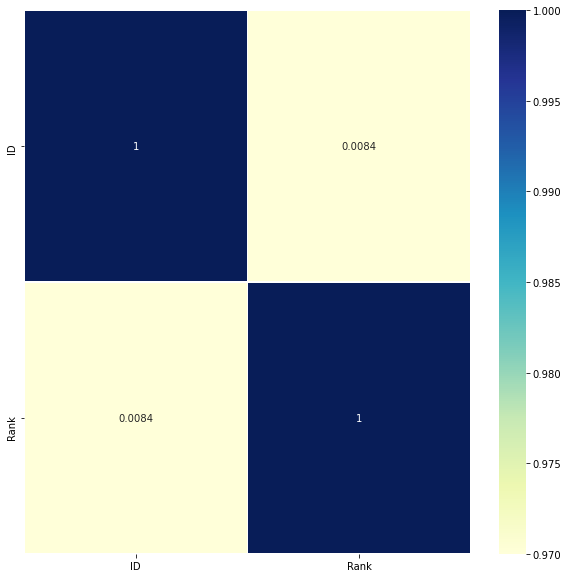

In [23]:
corrmatrix =data_2.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corrmatrix,vmin=.97,vmax=1,annot=True,linewidth=.2,cmap='YlGnBu')

we have sucessfully ploted corelation matrix but find out that we need to perform chisquare teat because they are all categorical varibles


first let us find out correlation b/w Short Description and long Description and set p value as .05 Here null hypothesis: there is no correlation between Short Description and long Description Alternative Hypothesis: there is correlation between the features

In [24]:
ct = pd.crosstab(data_2['Short Description'], data_2['Long Description'])
stat,p,dof,expected=stats.chi2_contingency(ct)
print(f'chisquare value:{stat}')
print(f'p value:{p}')

chisquare value:24400.000000000004
p value:0.0


so both features are Highly co related

now let us check whethere ranking is colelated or not

In [25]:
ct = pd.crosstab(data_2['Short Description'], data_2['Rank'])
stat,p,dof,expected=stats.chi2_contingency(ct)
print(f'chisquare value:{stat}')
print(f'p value:{p}')

chisquare value:6067.446466498302
p value:0.0


so there are co-relation between short description, long description and ranking

In [26]:
#Now let us check whether keyword has corelation with ranking
#set p value as .05
#Here null hypothesis: there is no correlation between keyword and Rank
#Alternative Hypothesis: there is correlation between the features

In [27]:
ct = pd.crosstab(data_2['Keyword'], data_2['Rank'])
stat,p,dof,expected=stats.chi2_contingency(ct)
print(f'chisquare value:{stat}')
print(f'p value:{p}')

chisquare value:3290.616855972886
p value:0.0


# 2. Does APP ID (Also known as package name) play any role in ranking?

In [28]:
pd.crosstab(data_2['App ID'], data_2['Rank'])

Rank,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,134.0
App ID,,,,,,,,,,,,,,,,,,,,,
com.android.chrome,18,6,7,6,1,5,4,11,1,8,...,0,0,0,0,0,0,0,0,0,0
com.brave.browser,5,201,57,39,20,23,9,10,2,2,...,0,0,0,0,0,0,0,0,0,0
com.cloudmosa.puffinTV,72,212,80,76,32,36,40,8,16,12,...,0,0,0,0,0,0,0,0,0,0
com.duckduckgo.mobile.android,428,12,0,0,12,104,24,10,2,0,...,0,0,0,0,0,0,0,0,0,0
com.opera.browser,8,38,62,44,50,34,26,16,12,10,...,0,0,0,0,0,0,0,0,0,0
com.transsion.phoenix,0,0,0,0,0,6,11,15,15,20,...,1,0,1,0,0,0,1,0,1,0
com.vivaldi.browser,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,2,2,1,2,0,1
net.fast.web.browser,31,21,8,5,10,5,8,12,8,8,...,0,0,0,0,0,0,0,0,0,0


we find out that there are only 8 app ids

Text(0.5, 1.0, 'Top 20 Rank Wise Count \n')

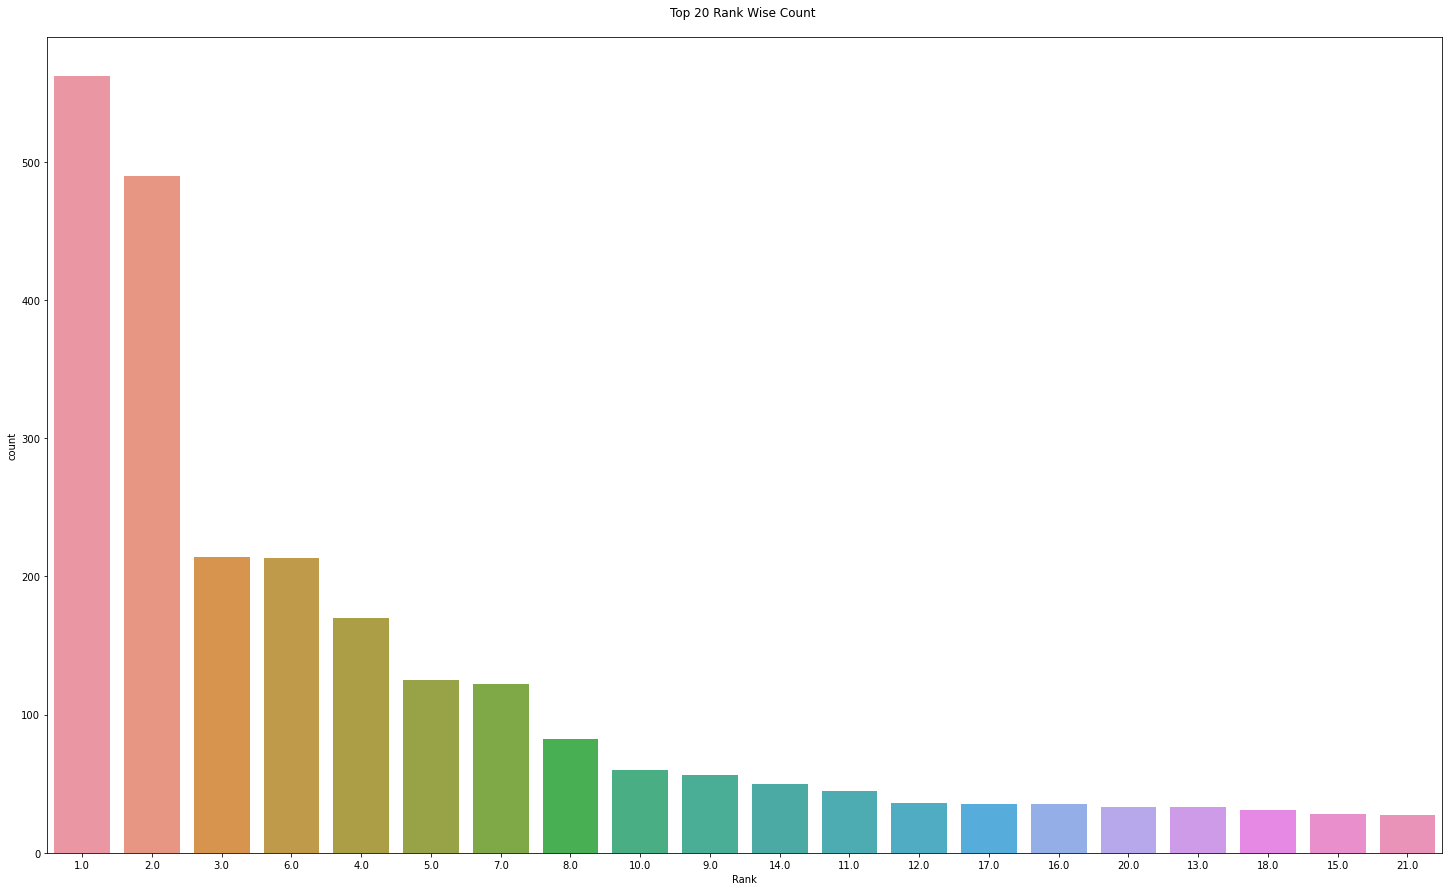

In [29]:
ItemCount = data_2["Rank"].value_counts().nlargest(20)
plt.figure(figsize=(25,15))
sns.countplot(data_2['Rank'],order = data_2['Rank'].value_counts().nlargest(20).index)
plt.title('Top 20 Rank Wise Count \n')

In [30]:
ct = pd.crosstab(data_2['App ID'], data_2['Rank'])
stat,p,dof,expected=stats.chi2_contingency(ct)
print(f'chisquare value:{stat}')
print(f'p value:{p}')

chisquare value:6067.446466498302
p value:0.0


so APP ID and Rank are co related Any other pattern or good questions that you can think of and answer? do ID column and rank co related no from co relation matrix it is clear that ID and rank are not co related but ID has no Feature Importance so we can drop id

In [31]:
data_2=data_2.drop(['ID'],axis=1)

# 3. Any other pattern or good questions that you can think of and answer?